In [2]:
import pandas as pd

df = pd.read_csv('..\data\TIC.csv', sep = ';',encoding='latin-1')
df.columns= ['a','b','Genero', 'Edad','Realizacion', 'Interés', 'Valor_exposicion', 'Recomendacion', 'Utilidad_contenidos', 'Satisfaccion_s1', 'Satisfaccion_s2','Satisfaccion_s3','Satisfaccion_total','Pregunta']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   a                    2239 non-null   object
 1   b                    2239 non-null   object
 2   Genero               2239 non-null   object
 3   Edad                 2239 non-null   int64 
 4   Realizacion          2239 non-null   int64 
 5   Interés              2239 non-null   int64 
 6   Valor_exposicion     2239 non-null   int64 
 7   Recomendacion        2239 non-null   object
 8   Utilidad_contenidos  2239 non-null   int64 
 9   Satisfaccion_s1      2239 non-null   int64 
 10  Satisfaccion_s2      2239 non-null   int64 
 11  Satisfaccion_s3      2239 non-null   int64 
 12  Satisfaccion_total   2239 non-null   int64 
 13  Pregunta             1659 non-null   object
dtypes: int64(9), object(5)
memory usage: 245.0+ KB


In [3]:
import numpy as np
caracteres= []
palabras = []
pregunta = []
for x in df.Pregunta:
    if type(x) == float:
        x=''
    a = x.split()
    pregunta.append(x)
    palabras.append(len(a))
    b =0
    for y in x:
        b+=1
    caracteres.append(b)
df['Caracteres']=caracteres
df['Palabras']= palabras
del(df['Pregunta'])
recomendacion = []
for x in df.Recomendacion:
    if x == 'si':
        recomendacion.append(0)
    else:
        recomendacion.append(1)
Recomendacion = df.Recomendacion
del(df['Recomendacion'])
df['Recomendacion_binaria'] = recomendacion
genero = []

for x in df.Genero:
    if x == 'Femenino':
        genero.append(1)
    elif x == 'Masculino':
        genero.append(0)
Genero = df.Genero
df['Genero_binario'] = genero
del(df['Genero'])
del(df['a'])
del(df['b'])


df['Genero'] = Genero
df['Recomendacion']=Recomendacion
df['Pregunta'] = pregunta


In [12]:
x= df.Pregunta
df1 = pd.DataFrame(x)
for y in range(len(df1.Pregunta)):
    if type(df1.iloc[y,0])==float:
        df1.iloc[y,0] = 'Sin respuesta'
df1

df2 = pd.DataFrame(df1.Pregunta.value_counts())
df2[df2.Pregunta<4] = np.NaN
df2.dropna(inplace=True)
lista=[]
for x in df1.Pregunta.unique():
    if not (x in df2.index):
        lista.append(x)
print(len(lista))
print(lista)
df1[df1.Pregunta.isin(lista)] = np.NaN
df1.dropna(inplace=True)


360
['no cambiaria nada todo ha sido muy interesante y espero que venga otra vez la psicologa', 'nada, me gusta mucho lo que enseña la psicologa', 'las tres sesiones me han parecido perfectas', 'mas sesiones ya que es importante para nuestra vida', 'como evitar cada uno de los problemas', 'mas formas para engañas', 'mas sesiones porque te informas de los problemas de internet', 'mas sentimientos', 'mas cosas sobre internet y añadir mas temas sobre psicología', 'añadiria porque o sea dar como mas cosas para convencer a los niños a no tener redes sociales', 'que las cosas fuesen más serias y que pusieran vídeos de las consecuencias del internet y que hablasen sobre mas cosas de ese tema', 'no cambiaria nada, siento que se habla de todo lo necesario que hay que saber', ' nada me ha encantado', 'nade', 'nada me ha encatado', 'mas interactividad', 'mas psicologos', 'nad', 'nada porque me parece que lo ha hecho muy bien y no le hace falta nada', ' mas juegso', 'musica', 'mas tiempos', 'El mi

In [13]:
for x in lista:
    if len(x)>30:
        print(x)

no cambiaria nada todo ha sido muy interesante y espero que venga otra vez la psicologa
nada, me gusta mucho lo que enseña la psicologa
las tres sesiones me han parecido perfectas
mas sesiones ya que es importante para nuestra vida
como evitar cada uno de los problemas
mas sesiones porque te informas de los problemas de internet
mas cosas sobre internet y añadir mas temas sobre psicología
añadiria porque o sea dar como mas cosas para convencer a los niños a no tener redes sociales
que las cosas fuesen más serias y que pusieran vídeos de las consecuencias del internet y que hablasen sobre mas cosas de ese tema
no cambiaria nada, siento que se habla de todo lo necesario que hay que saber
nada porque me parece que lo ha hecho muy bien y no le hace falta nada
a mi me parece que está genial y que no hay que cambiar nada
a mi me parece que esta genial y que no hay que cambiar nada
me parece divertido y a la vez explicativo no cambiaria nada
está genial la sesión, yo no cambiaría nada
Ninguno

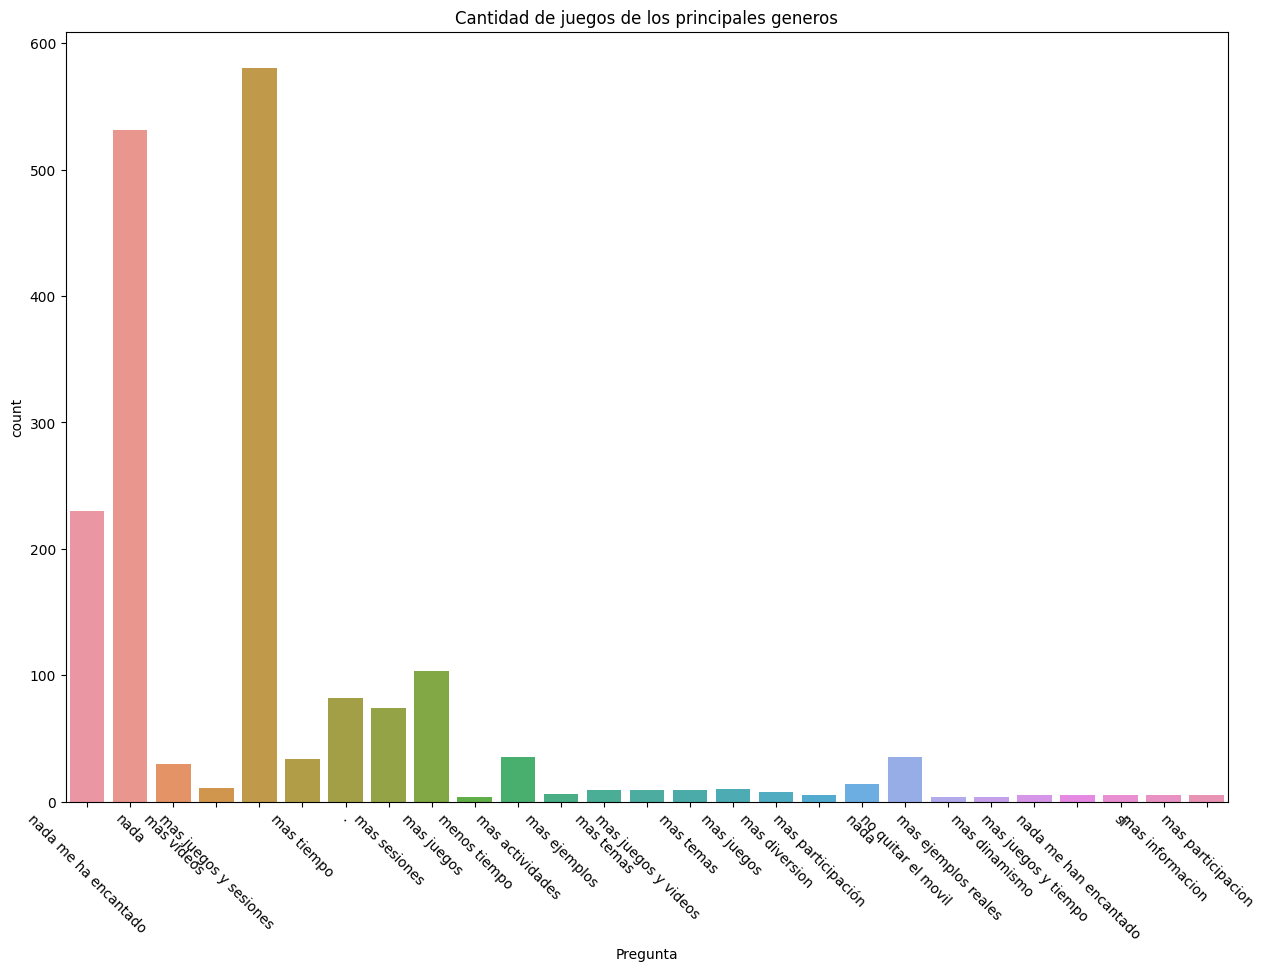

In [14]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(15,10))
fig = sb.countplot(x = df1.Pregunta)
plt.xticks(rotation=-45)
plt.title('Cantidad de juegos de los principales generos')
f= fig.figure

In [21]:
from sklearn.ensemble import RandomForestRegressor

X = df.iloc[:,1:-3]
Y = df.Edad
names = X.columns
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,Y)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
print(pd.DataFrame(scores, columns=['Score', 'Feature']))

from sklearn.feature_selection import SelectKBest
print (X.shape)
sel = SelectKBest(k = 5)
X_new = sel.fit_transform(X,Y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

     Score                Feature
0   0.2251             Caracteres
1   0.1113               Palabras
2   0.1020        Satisfaccion_s1
3   0.0896    Utilidad_contenidos
4   0.0885            Realizacion
5   0.0765        Satisfaccion_s2
6   0.0751         Genero_binario
7   0.0633        Satisfaccion_s3
8   0.0605                Interés
9   0.0545       Valor_exposicion
10  0.0483     Satisfaccion_total
11  0.0052  Recomendacion_binaria
(2239, 12)
(2239, 5)
[2.47708664 2.06818707 2.53114467 2.3446005  1.72291191 2.31925083
 4.16928138 4.75195228 2.61221233 2.18383366 1.04523599 0.92597978]


,column,score
7,Satisfaccion_total,4.751952
6,Satisfaccion_s3,4.169281
8,Caracteres,2.612212
2,Valor_exposicion,2.531145
0,Realizacion,2.477087
3,Utilidad_contenidos,2.344600
5,Satisfaccion_s2,2.319251
9,Palabras,2.183834
1,Interés,2.068187
4,Satisfaccion_s1,1.722912


In [20]:
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:,:-4]
Y1 = df.Genero
names = X.columns
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X,Y1)

scores = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)
print(pd.DataFrame(scores, columns=['Score', 'Feature']))

from sklearn.feature_selection import SelectKBest
print (X.shape)
sel = SelectKBest(k = 5)
X_new = sel.fit_transform(X,Y1)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': names, 'score': sel.scores_}).sort_values('score', ascending=False)

     Score                Feature
0   0.1761                   Edad
1   0.1293             Caracteres
2   0.0900        Satisfaccion_s2
3   0.0891        Satisfaccion_s1
4   0.0820               Palabras
5   0.0801                Interés
6   0.0773    Utilidad_contenidos
7   0.0750            Realizacion
8   0.0679        Satisfaccion_s3
9   0.0622       Valor_exposicion
10  0.0574     Satisfaccion_total
11  0.0136  Recomendacion_binaria
(2239, 12)
(2239, 5)
[ 0.59452664  8.5970985   6.03329201  8.33776568 17.84777216  7.21730703
  0.06236246 14.09034516 22.49615396 41.19486334 40.34666939  6.60754761]


,column,score
9,Caracteres,41.194863
10,Palabras,40.346669
8,Satisfaccion_total,22.496154
4,Utilidad_contenidos,17.847772
7,Satisfaccion_s3,14.090345
1,Realizacion,8.597098
3,Valor_exposicion,8.337766
5,Satisfaccion_s1,7.217307
11,Recomendacion_binaria,6.607548
2,Interés,6.033292


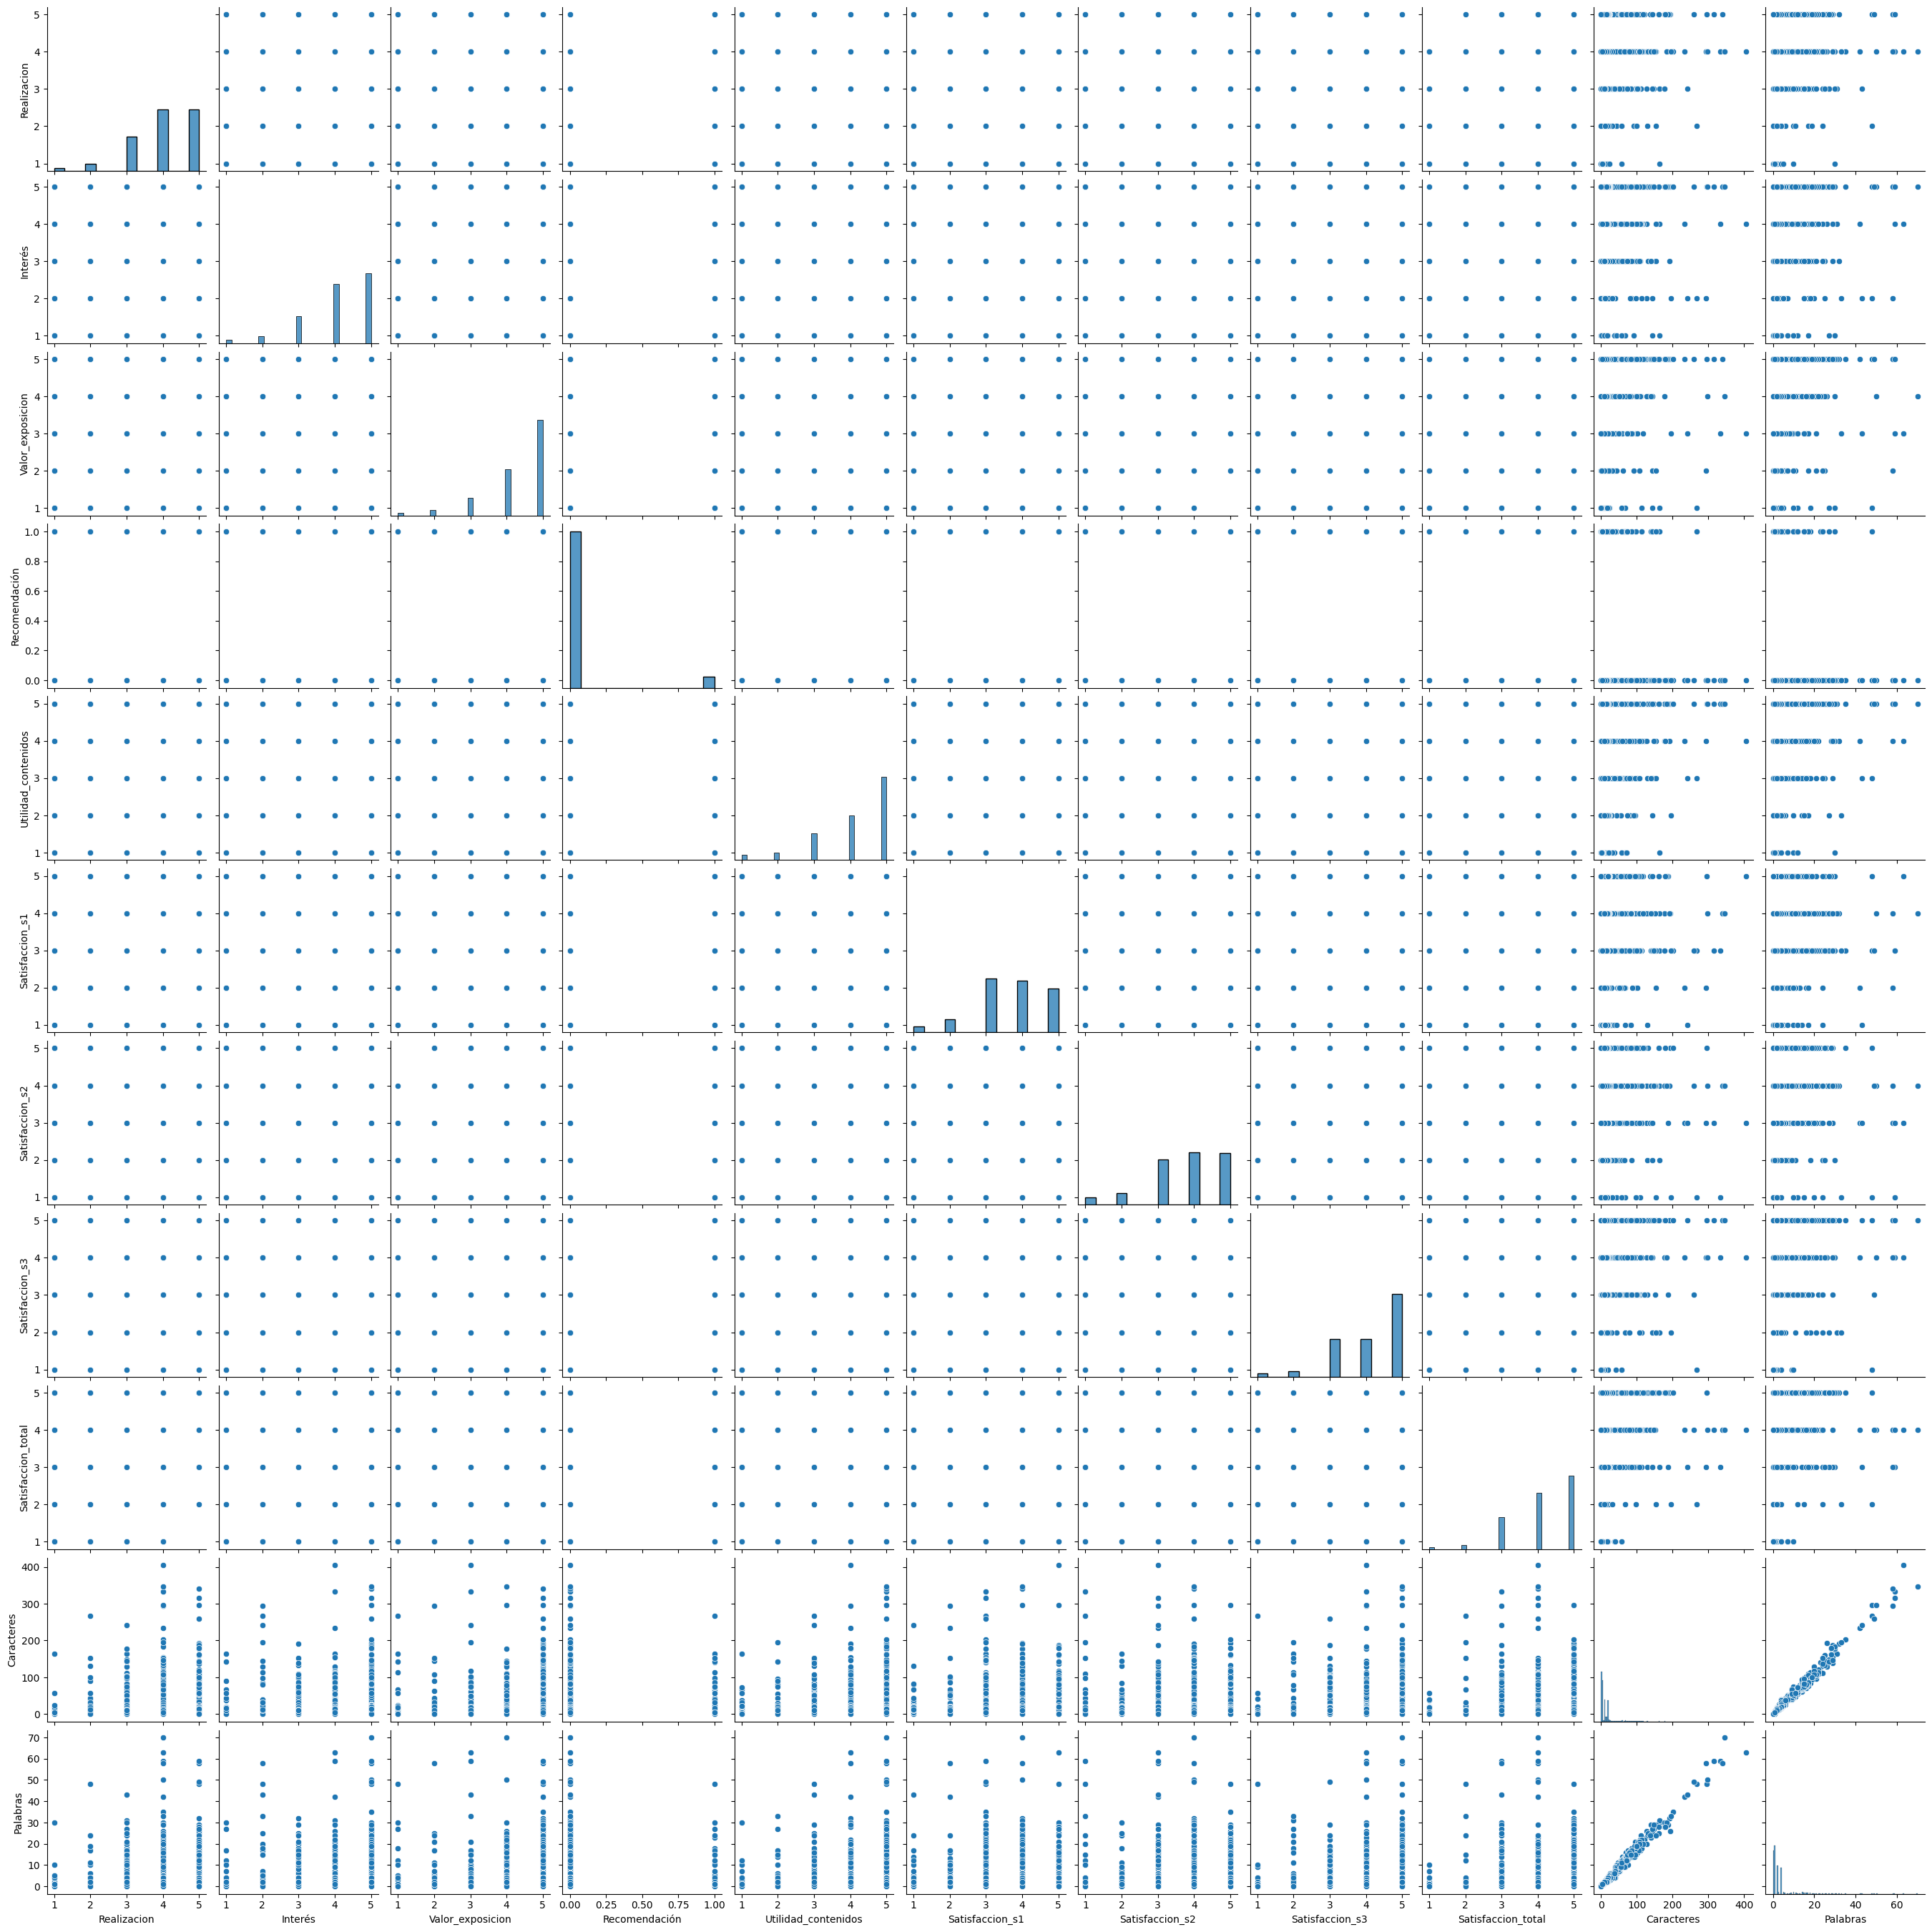

In [81]:
import seaborn as sns
sns.pairplot(X)

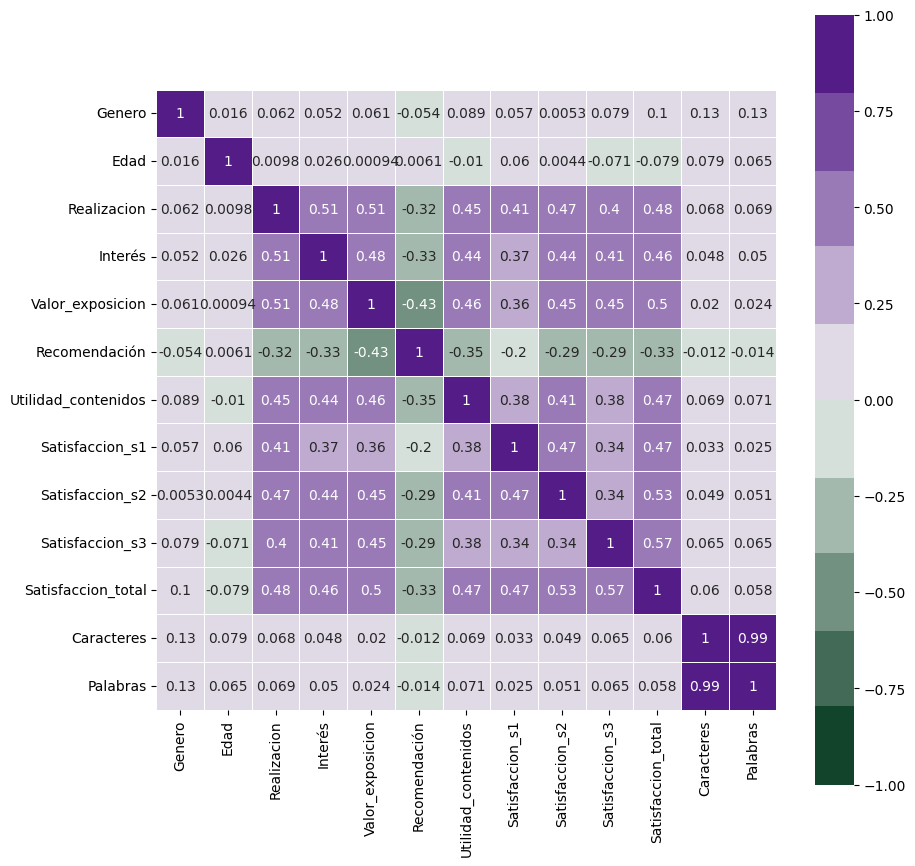

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

In [ ]:
#Clustering

In [4]:
from sklearn.cluster import KMeans
import pickle

df1 = pd.DataFrame(df)
df1 = df1[df1.Edad <20] 
del(df1['Caracteres'])
del(df1['Palabras'])
k=2
X1 = df1.iloc[:,:-3]
Kmeans = KMeans(n_clusters=k,random_state=42)

with open('../model/my_model_kmeans', 'wb') as archivo_salida:
    pickle.dump(Kmeans,archivo_salida)

y_pred=Kmeans.fit_predict(X1)
y_pred1 = pd.Series(y_pred)
print(y_pred1.value_counts())
df1['cluster'] = y_pred

df1[df1.cluster==0].describe()

0    1365
1     851
dtype: int64


,Edad,Realizacion,Interés,Valor_exposicion,Utilidad_contenidos,Satisfaccion_s1,Satisfaccion_s2,Satisfaccion_s3,Satisfaccion_total,Recomendacion_binaria,Genero_binario,cluster
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.0
mean,13.013919,4.415385,4.481319,4.709890,4.597802,4.030769,4.244689,4.567766,4.598535,0.016117,0.516484,0.0
std,1.719036,0.737296,0.683259,0.556958,0.669942,0.916094,0.823177,0.725015,0.589496,0.125973,0.499911,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,12.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.0
50%,13.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,0.000000,1.000000,0.0
75%,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,1.000000,0.0
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.0


In [5]:
from sklearn.cluster import KMeans
import pickle

df1 = pd.DataFrame(df)
df1 = df1[df1.Edad <20] 
del(df1['Caracteres'])
del(df1['Palabras'])
k=2
X1 = df1.iloc[:,:-3]


with open('../model/my_model_kmeans', 'rb') as archivo_entrada:
    Kmeans = pickle.load(archivo_entrada)

y_pred=Kmeans.fit_predict(X1)
y_pred1 = pd.Series(y_pred)
print(y_pred1.value_counts())
df1['cluster'] = y_pred

df1[df1.cluster==0].describe()

0    1365
1     851
dtype: int64


,Edad,Realizacion,Interés,Valor_exposicion,Utilidad_contenidos,Satisfaccion_s1,Satisfaccion_s2,Satisfaccion_s3,Satisfaccion_total,Recomendacion_binaria,Genero_binario,cluster
count,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.000000,1365.0
mean,13.013919,4.415385,4.481319,4.709890,4.597802,4.030769,4.244689,4.567766,4.598535,0.016117,0.516484,0.0
std,1.719036,0.737296,0.683259,0.556958,0.669942,0.916094,0.823177,0.725015,0.589496,0.125973,0.499911,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
25%,12.000000,4.000000,4.000000,5.000000,4.000000,3.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.0
50%,13.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,0.000000,1.000000,0.0
75%,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.000000,1.000000,0.0
max,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,0.0


In [ ]:
#La Clasificación

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Edad                   2239 non-null   int64 
 1   Realizacion            2239 non-null   int64 
 2   Interés                2239 non-null   int64 
 3   Valor_exposicion       2239 non-null   int64 
 4   Utilidad_contenidos    2239 non-null   int64 
 5   Satisfaccion_s1        2239 non-null   int64 
 6   Satisfaccion_s2        2239 non-null   int64 
 7   Satisfaccion_s3        2239 non-null   int64 
 8   Satisfaccion_total     2239 non-null   int64 
 9   Caracteres             2239 non-null   int64 
 10  Palabras               2239 non-null   int64 
 11  Recomendacion_binaria  2239 non-null   int64 
 12  Genero_binario         2239 non-null   int64 
 13  Genero                 2239 non-null   object
 14  Recomendacion          2239 non-null   object
 15  Pregunta             

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.pipeline import Pipeline
import pickle
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)

from sklearn.model_selection import train_test_split 

df2 = pd.DataFrame(df)
X= df2.iloc[:,:-4]
y = df.Genero_binario

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

x_train['y'] = y_train
x_train= x_train[x_train.Edad < 20]
y_train = x_train.y
del(x_train['y'])

pipe_rf = Pipeline(steps=[('Standar', StandardScaler()),("classifier", RandomForestClassifier())])
pipe_lg = Pipeline([('Standar', StandardScaler()),('classifier',LogisticRegression())])

logistic_params = {
    'classifier': [LogisticRegression()],        
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.arange(0.1, 4, 0.5)
}


random_forest_params = {
    'classifier': [RandomForestClassifier()],
    "classifier__n_estimators": list(range(100,200,10)),
    'classifier__max_features': [3,4,5,6,10,15,17]
}


search_space_lg = [logistic_params]
search_space_rf = [ random_forest_params]

grid_lg = GridSearchCV(pipe_lg,
                   search_space_lg,
                   cv = 10,
                   n_jobs=-1)

grid_rf = GridSearchCV(pipe_rf,
                   search_space_rf,
                   cv = 10,
                   n_jobs=-1)

grid_lg.fit(x_train, y_train)
grid_rf.fit(x_train,y_train)

with open('../model/modelo_clasificacion_rf', 'wb') as archivo_salida:
    pickle.dump(grid_rf.best_estimator_,archivo_salida)
with open('../model/modelo_clasificacion_lg', 'wb') as archivo_salida:
    pickle.dump(grid_lg.best_estimator_,archivo_salida)
grids = {
    "gs_reg_log": grid_lg,
    "gs_rand_forest": grid_rf

}




In [175]:
grids = {
    "gs_reg_log": grid_lg,
    "gs_rand_forest": grid_rf

}
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
1,gs_rand_forest,0.577242
0,gs_reg_log,0.556954


In [239]:

from sklearn.model_selection import train_test_split 

df3 = pd.DataFrame(df)
X= df3.iloc[:,1:-3]
y = df.Edad

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

x_train['y'] = y_train
x_train= x_train[x_train.y < 20]
y_train = x_train.y
del(x_train['y'])

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(x_train,y_train)
prediction = tree_reg.predict(x_test)
prediction_round_int = list(prediction)
for x in range(len(prediction)):
    prediction_round_int[x]=round(prediction_round_int[x])

error_tree = np.abs(y_test-np.array(prediction_round_int))
print('Mean Absolute Error en train: ', round(np.mean(error), 2), ' degrees.')



Mean Absolute Error en train:  1.83  degrees.


In [257]:

from sklearn.model_selection import train_test_split 

df3 = pd.DataFrame(df)
X= df3.iloc[:,1:-3]
y = df.Edad

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

x_train['y'] = y_train
x_train= x_train[x_train.y < 20]
y_train = x_train.y
del(x_train['y'])

from sklearn.linear_model import LinearRegression
pipe1 = Pipeline(steps=[('Standar', StandardScaler()),("classifier", LinearRegression())])


pipe1.fit(x_train,y_train)
prediction = pipe1.predict(x_test)

prediction_round_int = list(prediction)

for x in range(len(prediction)):
    prediction_round_int[x]=round(prediction_round_int[x])

error = np.abs(y_test-np.array(prediction_round_int))
print('Mean Absolute Error en train: ', round(np.mean(error), 2), ' degrees.')


Mean Absolute Error en train:  1.85  degrees.


In [252]:
with open('model\modelo_regresion_lr', 'rb') as archivo_entrada:
        regresor_lr = pickle.load(archivo_entrada)
        
from sklearn.model_selection import train_test_split 

df3 = pd.DataFrame(df)
X= df3.iloc[:,1:-3]
y = df.Edad

x_train,x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

x_train['y'] = y_train
x_train= x_train[x_train.y < 20]
y_train = x_train.y
del(x_train['y'])
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

prediction = regresor_lr.predict(x_test)

prediction_round_int = list(prediction)

for x in range(len(prediction)):
    prediction_round_int[x]=round(prediction_round_int[x])

error = np.abs(y_test-np.array(prediction_round_int))
print('Mean Absolute Error en train: ', round(np.mean(error), 2), ' degrees.')

Mean Absolute Error en train:  1.85  degrees.


In [258]:
with open('../model/modelo_regresion_lr', 'wb') as archivo_salida:
    pickle.dump(pipe1,archivo_salida)
with open('../model/modelo_regresion_tree', 'wb') as archivo_salida:
    pickle.dump(tree_reg,archivo_salida)

In [244]:
pipe_rf = Pipeline(steps=[('Standar', StandardScaler()),("classifier", RandomForestClassifier())])
pipe_lg = Pipeline([('Standar', StandardScaler()),('classifier',LogisticRegression())])

logistic_params = {
    'classifier': [LogisticRegression()],        
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.arange(0.1, 4, 0.5)
}


random_forest_params = {
    'classifier': [RandomForestClassifier()],
    "classifier__n_estimators": list(range(100,200,10)),
    'classifier__max_features': [3,4,5,6,10,15,17]
}


search_space_lg = [logistic_params]
search_space_rf = [ random_forest_params]

grid_lg = GridSearchCV(pipe_lg,
                   search_space_lg,
                   cv = 10,
                   n_jobs=-1)

grid_rf = GridSearchCV(pipe_rf,
                   search_space_rf,
                   cv = 10,
                   n_jobs=-1)

grid_lg.fit(x_train, y_train)
grid_rf.fit(x_train,y_train)
grids = {
    "gs_reg_log": grid_lg,
    "gs_rand_forest": grid_rf

}
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

with open('model/modelo_clasificacion_rf', 'wb') as archivo_salida:
    pickle.dump(grid_rf.best_estimator_,archivo_salida)
with open('model/modelo_clasificacion_lg', 'wb') as archivo_salida:
    pickle.dump(grid_lg.best_estimator_,archivo_salida)


,Grid,Best score
0,gs_reg_log,0.234501
1,gs_rand_forest,0.227766


In [246]:
with open('../model/modelo_clasificacion1_rf', 'wb') as archivo_salida:
    pickle.dump(grid_rf.best_estimator_,archivo_salida)
with open('../model/modelo_clasificacion1_lg', 'wb') as archivo_salida:
    pickle.dump(grid_lg.best_estimator_,archivo_salida)

In [249]:
error

1513    2
111     3
1922    1
461     1
2171    1
       ..
1537    3
1357    1
494     2
727     1
1650    4
Name: Edad, Length: 448, dtype: int64

In [245]:
error = np.abs(y_test-grid_lg.predict(x_test))
print('Mean Absolute Error en train: ', round(np.mean(error), 2), ' degrees.')
error = np.abs(y_test-grid_rf.predict(x_test))
print('Mean Absolute Error en train: ', round(np.mean(error), 2), ' degrees.')

Mean Absolute Error en train:  1.99  degrees.
Mean Absolute Error en train:  2.07  degrees.
